# __Conway's Game of Life__
>The Game of Life, also known simply as Life, is a cellular automaton devised by the British mathematician
>John Horton Conway in 1970. It is a zero-player game, meaning that its evolution is determined by its initial
>state, requiring no further input. One interacts with the Game of Life by creating an initial configuration and
>observing how it evolves.
> ~ Wikipedia
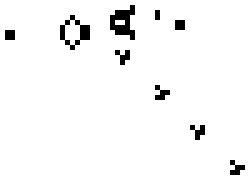

Here, I attempt to programme the game of life with python.
Starting off with an m × n rectangular grid of cells, where each cell is either
dead or alive, the evolution of the cells in this society proceeds for several generations
 according to the following rules:
1. Only live cells with 2 or 3 neighbours will survive in the next generation. All other live cells die.
2. Any dead cell with exactly three live neighbours becomes a live cell in the next generation
Note that cells can have up to 8 neighbours, where a neighbour is a cell that is directly adjacent or diagonal
to the cell.

### In this exercise, I attempted to code the Game of Life __pythonically__ by using Python features such as list comprehension and minimising the number of lines of code where possible.

# Step 1: Building a society
I begin creating a function, build_society(), to build an m × n sized society randomly populated with `live (*)` and `dead(-)` cells. \
**Parameters**: \
&nbsp;&nbsp;&nbsp;&nbsp;`m (int)`: The number of rows of the society.  \
&nbsp;&nbsp;&nbsp;&nbsp;`n (int)`: The number of columns of the society. \
    **Returns**: \
&nbsp;&nbsp;&nbsp;&nbsp;the resulting randomly built society.

In [40]:
from random import randint
def build_society(m: int, n: int) -> list:
    l = [['*' if randint(0,1) == 1 else '-' for j in range(n)] for i in range(m)]
    return l


[['-', '-', '*', '*', '*'], ['*', '*', '*', '*', '*'], ['-', '-', '*', '-', '-']]


The function build_society returns the generated society in a nested list format, where it is difficult to visualise society properly:

In [41]:
test_society = build_society(3, 5)
print(test_society)

[['*', '-', '*', '-', '-'], ['-', '*', '-', '*', '*'], ['*', '*', '-', '-', '*']]


Thus, I employ a function which prints the society in its native grid format.

In [42]:
def print_society(society: list) -> None:
    print('\n'.join([' '.join(row) for row in society]))

print_society(test_society)

* - * - -
- * - * *
* * - - *


# Step 2: Modeling the Society
I define a function model_society(), where, given a multiline string representing the society, eg.
```python
'''
- * * * -
- - - - *
* * * * -
'''
```
return a nested list representing the society:
```python
[['-', '*', '*', '*', '-'],
 ['-', '-', '-', '-', '*'],
 ['*', '*', '*', '*', '-']]
```
The nested list representation of the society would be more readily iterpretable by the functions I define and call later on.

In [3]:
def model_society(txt):
    l = [i for i in txt.splitlines() if i]
    return [[j for j in i if j != ' '] for i in l]

### Testing the model_society() function

In [4]:
print(model_society('''
- * * * -
- - - - *
* * * * -
'''))

[['-', '*', '*', '*', '-'], ['-', '-', '-', '-', '*'], ['*', '*', '*', '*', '-']]


In [5]:
print_society(model_society('''
- * * * -
- - - - *
* * * * -
'''))

- * * * -
- - - - *
* * * * -


# Step 3: Coding the Game-of-Life Rules
Given the `cell_value` (True for alive and False for dead), and the `live_neigh` (no. of neighbours alive), the gol function returns a True value if the cell lives in the next generation, and False otherwise.

In [6]:
def gol(cell_value : bool, live_neigh : int) -> bool :
    return (cell_value and live_neigh in (2,3)) or (not cell_value and live_neigh == 3)

### Testing the gol() function

In [7]:
print(gol(True, 3)) # Since cell is currently alive and has 3 neighbours, it is destined to live
print(gol(False, 3)) # Since cell is currently dead with exactly 3 neighbours, it is destined to become alive

True
True


# Step 4: Tabulating Game-of-Life Rules
I make a function that displays a list of the possible outcomes of the cell based on whether it is dead or alive. The index of the list corresponds with the number of neighbours.

In [17]:
def tabulate(rules):
    l1=['live' if rules(True, i) else 'dead' for i in range(9)]
    l2=['live' if rules(False,i) else 'dead' for i in range(9)]
    return [('live',l1),('dead',l2)]

import pprint as pp
pp.pprint(tabulate(gol))


[('live',
  ['dead', 'dead', 'live', 'live', 'dead', 'dead', 'dead', 'dead', 'dead']),
 ('dead',
  ['dead', 'dead', 'dead', 'live', 'dead', 'dead', 'dead', 'dead', 'dead'])]


# Step 5: Determining a cell's destiny
I define a function destiny(society, coordinates, gol) that determines a cell's destiny based on the game of life rules. \
**Parameters**: \
&nbsp;&nbsp;&nbsp;&nbsp;`society      (list)`: The society. \
&nbsp;&nbsp;&nbsp;&nbsp;`coordinates (tuple)`: The tuple representing the coordinates whose destiny is to be determined. \
&nbsp;&nbsp;&nbsp;&nbsp;`gol`                : The game-of-life rules \
    **Returns**: \
&nbsp;&nbsp;&nbsp;&nbsp; the cell's destiny, where `'-'` is a dead cell, and `'*'` is a live cell.


In [9]:
def destiny(society: list, coordinates: tuple, gol) -> str:
    a = coordinates[0]
    b = coordinates[1]
    live_neigh = 0
    cell_value = True if society[a][b] == '*' else False
    for i in [a-1,a,a+1]:
        if i < 0 or i >= len(society):
            continue
        for j in [b-1, b, b+1]:
            if j < 0 or j >= len(society[0]):
                continue
            if j == b and i == a:
                continue
            live_neigh += 1 if society[i][j] == '*' else 0
    new_cell_value = '*' if gol(cell_value, live_neigh) else '-'

    return new_cell_value

### Testing the destiny function

In [10]:
#Build a new society
society = build_society(5, 5)
print_society(society)

- - * - -
* * - - -
* * - * -
- * * - *
- - - * -


In [11]:
#find the destiny of the cells at (4,1) and (2,3)
print(destiny(society, (4, 1), gol))
print(destiny(society, (2, 3), gol))

-
*


# Step 6: Evolving the Society
I start with a function that evolevs the society once. \
**Parameters:**  
&nbsp;&nbsp;&nbsp;&nbsp;`society (list)`: The society to be evolved.  
&nbsp;&nbsp;&nbsp;&nbsp;`gol`: A function encoding game-of-life rules  
  
**Returns:**  
&nbsp;&nbsp;&nbsp;&nbsp;the resulting society as a list

In [12]:
def evolve_once(society, gol):
    l1 = []
    for a in range(len(society)):
        l2 = []
        l1.append(l2)
        for b in range(len(society[0])):
            cell_value = True if society[a][b] == '*' else False
            live_neigh = 0
            for i in [a-1,a,a+1]:
                if i < 0 or i >= len(society):
                    continue
                for j in [b-1, b, b+1]:
                    if j < 0 or j >= len(society[0]):
                        continue
                    if j == b and i == a:
                        continue
                    live_neigh += 1 if society[i][j] == '*' else 0
            new_cell_value = '*' if gol(cell_value, live_neigh) else '-'
            l2.append(new_cell_value)
    return l1


## Testing evolve_once
I now test elolve_once() function repeatedly on a society that is known to oscillate between 2 states: the bar. If I start off with a vertical bar 3 grid spaces across, in the next ietartion it becomes a horizontal bar, then it goes back to a vertical bar in the next iteraton and the cycle continues indefinitely (assuming no other cells surrounding are present to interupt this cycle.

In [31]:
bar_society = '''
- - - - -
- - * - -
- - * - -
- - * - -
- - - - -
'''

### Evolving once:

In [30]:
print_society(evolve_once(model_society(bar_society), gol))

- - - - -
- - - - -
- * * * -
- - - - -
- - - - -


### Evolving twice

In [29]:
print_society(evolve_once(evolve_once(model_society(bar_society), gol), gol))

- - - - -
- - * - -
- - * - -
- - * - -
- - - - -


### Evolving 3 times...

In [32]:
print_society(evolve_once(evolve_once(evolve_once(model_society(bar_society), gol), gol), gol))

- - - - -
- - - - -
- * * * -
- - - - -
- - - - -


### ...and the cycle continues


I now define another function, evolve(society: list, n, gol), which evolves the society by n iterations given the rules in Game Of Life.  It makes use of the previous evolve_once() function as a helper function.
\
**Parameters:**  
&nbsp;&nbsp;&nbsp;&nbsp;`society (list)`: The society to be evolved.  
&nbsp;&nbsp;&nbsp;&nbsp;`n (int)`: The number of evolutions to perform.  
&nbsp;&nbsp;&nbsp;&nbsp;`gol`: A function encoding game-of-life rules  
  
**Returns:**  
&nbsp;&nbsp;&nbsp;&nbsp;A tuple consisting of:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(1) resulting society  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(2) number of evolutions before arriving at stability*  \
*In cases where society contiues to evolve in all n interations or reaches an oscilaltory state like as demonstrated in the previous vertical/horizontal bar example, then the number of evolutions would also be n.



In [13]:
from copy import deepcopy
def evolve(society: list, n, gol) -> tuple:
    repeat = False
    counter = 0
    society_list = []
    while n != 0:
        if counter == 0 and society == [['-']]:
            break
        society_copy = deepcopy(society)
        society_list.append(society_copy)
        if counter >= 1 and (society_list[counter] == society_list[counter - 1]):
            counter -= 1
            break

        society = evolve_once(society_list[counter], gol)
        n -= 1
        counter += 1

    return society, counter

### Testing evolve()
A society with a single dead cell should remain dead indefinitely, even after a million generations:

In [33]:
evolve([['-']], 1_000_000 ,gol)

([['-']], 0)

Now, testing the vertical/horizontal bar example:

In [35]:
evolve(model_society(bar_society), 100, gol)

([['-', '-', '-', '-', '-'],
  ['-', '-', '*', '-', '-'],
  ['-', '-', '*', '-', '-'],
  ['-', '-', '*', '-', '-'],
  ['-', '-', '-', '-', '-']],
 100)

We still see a bar, and even after 100 iteratons it has still not reached stability. :

Now, I create a large random society 50 by 50 in dimension:

In [48]:
large_society = build_society(50, 50)
print_society(large_society)

- - - * * - * - * * - - - - * - * * - - - - * - - * * * - * * - - * - * - * - * * * - * * - * - - -
- - * - - - - * * - - * * - * * - - * * - * - * - * - * * - * - * - - - * * - * - - * - - * * * * -
* * * - - * * * - - - * - * - * * - * * - * * - - - * - * - - - * - * * * - - * * * - - * * * - * *
* * - - - * * * - - * - * * - * - * * * - * - * * * - * - * * * - - * - - * - - - - * * - - - - * *
* - - - - - * * - * - - - - - - - - * * - * * - - * * - - - * * * * * * - * * - - - * - * - - * - -
* * * - - - * * * - - - - - * * - * * - - - * * * - - * - - * - * - - - * * * - * * - * * - - - * *
- * * - * - * * * * - * * - - - - * * * - - * * - * * - - - * - - * * * * * * * - * * * - * * - - -
- * * - * * * * * - * * - * - * * * - * * * - * * * - - * - * - * - * * - - * - - - - * - - - * - -
* * * * - * - - * - * - - * - - - * * - - * * - * - * * - * - * - * - * * - - * - - * - - - - - * -
- - * - - - - * * * - * - - - * - * * - - * * - - * - - - - * - - * * * * * - - - - * * * * - - - -


And observe what happens to the society after 100 evolutions

In [49]:
print("number of iterations: ", evolve(large_society, 100, gol)[1])
print_society(evolve(large_society, 100, gol)[0])

number of iterations:  100
- - - - - - - - - - - - - - - - - * * - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - * - - - * - - - - - - * * - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - * * - - - * * * - - - - * - * - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - * * - - - - - * - * - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - * * - - * * - - - - * - - - - - - - - - - - - - - - - - - * * - - - - - - - - - - - -
- - - - - - - * * * * * - - - - - - * * - - - - - - - - - - - - - - - - * * - - - - - - - - - - - -
- - - - - - * * * * * * - - - - - - - - * - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - * * * - * - - - - - - - * * - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - * * - * * - - - - - - - - - - - - - - - - - - - - - - - - - * - - - - - * - - - - -
- - - - - - - - - * * * - - - - - - - - - - - - - - - - - - - - - - - - *

Amazingly, starting from a randomly generated starting society, some clear structures have begun to emerge after 100 iterations!
Now I'll try a 1000 iterations:

In [50]:
print("number of iterations: ", evolve(large_society, 1000, gol)[1])
print_society(evolve(large_society, 1000, gol)[0])

number of iterations:  1000
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - - - - - - - - - - - - * * - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - - - - - - - - - - - - * * - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 